# Optimizing the time of a physics simulation
Trying to optimize the steps for time so that it can be as close to a cosine wave using machine learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

In [42]:
gravity = 9.81
muu = 0
mass = 2
k = 40
x0 = 0.5
v0 = 0
delta_t = 0.01
prevpos = 0

In [275]:
def net_force(pos):
    return -k*pos
def acceleration(pos):
    return net_force(pos) / mass
def velocity(vel, pos, time):
    return vel + acceleration(pos) * time
def position(pos, vel, time):
    return pos + vel * time + 0.5 * acceleration(pos) * time**2

In [44]:
def cosine_baseline(xstrethc, time):
    omega = np.sqrt(k/mass)
    return xstrethc * np.cos(omega * time)

In [179]:
x = np.linspace(0, 10, 1000)
y_pos = np.zeros(1000, dtype=np.float64)
y_vel = np.zeros(1000, dtype=np.float64)
y_accel = np.zeros(1000, dtype=np.float64)

In [121]:
y_pos.shape

(1000,)

In [180]:
y_pos[0] = 0.5

In [130]:
y_vel[0]

0.0

In [ ]:
y_pos[1] = position(y_pos[-1], y_vel[-1], 0)
y_vel[1] = velocity(y_vel[-1], y_pos[-1], 0)
y_accel[1] = acceleration(y_pos[1])

In [93]:
y_vel.append(0)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [181]:
for i in range(1, 1000):
    y_pos[i] = position(y_pos[i-1], y_vel[i-1], delta_t)
    y_vel[i] = velocity(y_vel[i-1], y_pos[i-1], delta_t)
    y_accel[i] = acceleration(y_pos[i])

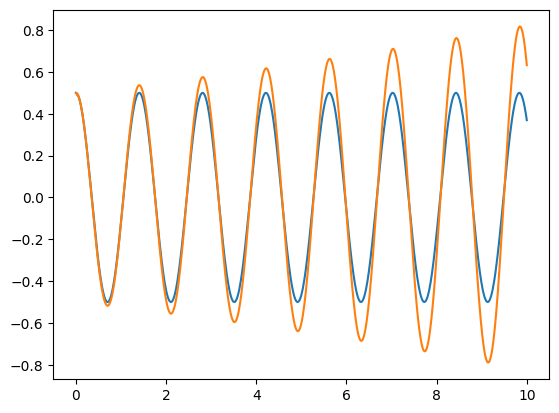

In [296]:
y2 = cosine_baseline(x0, x)
fig, ax = plt.subplots()
ax.plot(x, y2)
ax.plot(x, y_pos)
plt.show()

In [126]:
y_pos[0]

0.0

In [200]:
def inverse_exp(x):
    return 0.01/np.exp(x)

In [207]:
y3 = np.zeros(1000, dtype=np.float64)
y3[0] = 0.5
for i in range(1, 1000):
    y3[i] = position(y_pos[i-1], y_vel[i-1], inverse_exp(i))

/var/folders/qw/5rcwl4d96zvcq7zxv7fzt3m80000gn/T/ipykernel_5549/1657025530.py:2: RuntimeWarning: overflow encountered in exp
  return 0.01/np.exp(x)


In [204]:
y3.max()

False

In [206]:
inverse_exp(10)

4.539992976248485e-07

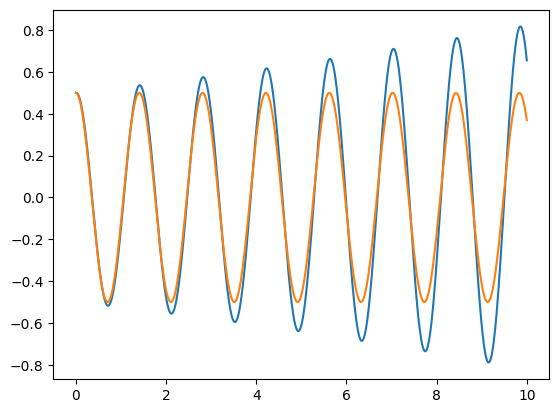

In [176]:
fig, ax = plt.subplots()
ax.plot(x, y3)
ax.plot(x, y2)
ax.plot(x, y_pos)
plt.show()

In [441]:
def exp_decay(x, a, b):
    return (1/a) * np.exp(-b * x)

In [442]:
from scipy.optimize import minimize

In [443]:
def y_exp_decay(x, a, b):
    ypos = np.zeros(1000, dtype=np.float64)
    yvel = np.zeros(1000, dtype=np.float64)
    ypos[0] = 0.5
    for i in range(1, 1000):
        ypos[i] = position(ypos[i-1], yvel[i-1], exp_decay(x, a, b))[0]
        yvel[i] = velocity(yvel[i-1], ypos[i-1], exp_decay(x, a, b))[0]
    return ypos

In [444]:
def calc_error(params, x, y_real):
    a, b = params
    y_pred = y_exp_decay(x, a, b)
    return np.sum((y_real - y_pred)**2)

In [511]:
result = minimize(calc_error, [100, 1], method="POWELL", tol=1e-19, args=(x, y2), options={ "xtol": 1e-20, "ftol": 1e-20, "maxiter": 100000})

In [512]:
result

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 16.029045255607762
       x: [ 9.995e+01  8.854e+00]
     nit: 3
   direc: [[ 1.000e+00  0.000e+00]
           [ 0.000e+00  1.000e+00]]
    nfev: 244

In [513]:
a_opt, b_opt = result.x
y_valid = y_exp_decay(x, a_opt, b_opt)

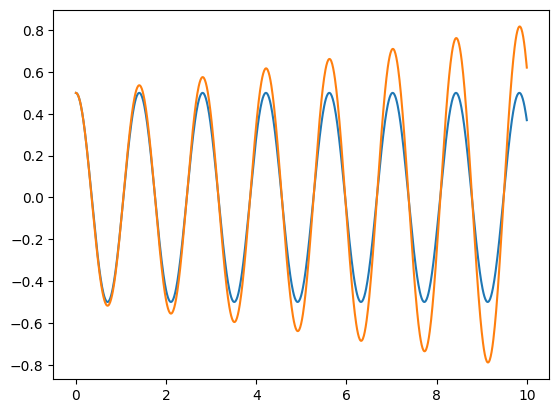

In [514]:
fig, ax = plt.subplots()
ax.plot(x, y2)
ax.plot(x, y_valid)
plt.show()